In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Filter_Unmerged.csv').drop(columns = ['Unnamed: 0'])
df.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,...,TOPG,VI,ORTG,DRTG,2PM,3PM,FGM,FGA,PTS,MINS
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,...,0.45,3.5,103.1,103.9,15.000,41.021,56.021,157,164.3,589.0
1,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,...,0.82,7.0,99.5,108.1,12.996,25.012,38.008,110,108.8,428.4
2,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,...,1.73,7.1,119.9,102.7,480.972,0.000,480.972,809,1112.0,2672.0
3,Bam Adebayo,Mia,C-F,21.73,82,23.3,48.6,15.8,17.1,226,...,1.48,9.0,120.0,97.2,276.948,3.000,279.948,486,729.8,1910.6
4,Deng Adel,Cle,F,22.19,19,10.2,21.3,9.9,13.7,4,...,0.32,3.1,85.3,115.7,5.005,6.003,11.008,36,32.3,193.8


In [2]:
df['AST'] = df['APG'] * df['GP']
df['REB'] = df['RPG'] * df['GP']
df['BLK'] = df['BPG'] * df['GP']
df['TOV'] = df['TOPG'] * df['GP']
df['STL'] = df['SPG'] * df['GP']

cols = ['PTS', 'AST', 'REB', 'BLK', 'TOV', 'STL']
for col in cols:
    df[col + 'P36'] = df[col] * 36 / df['MINS']

df.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG',
       '2PM', '3PM', 'FGM', 'FGA', 'PTS', 'MINS', 'AST', 'REB', 'BLK', 'TOV',
       'STL', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36'],
      dtype='object')

In [3]:
df.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,...,REB,BLK,TOV,STL,PTSP36,ASTP36,REBP36,BLKP36,TOVP36,STLP36
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,...,46.5,5.89,13.95,17.05,10.042105,1.136842,2.842105,0.360000,0.852632,1.042105
1,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,...,61.2,5.10,27.88,12.92,9.142857,5.428571,5.142857,0.428571,2.342857,1.085714
2,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,...,760.0,76.80,138.40,119.20,14.982036,1.724551,10.239521,1.034731,1.864671,1.605988
3,Bam Adebayo,Mia,C-F,21.73,82,23.3,48.6,15.8,17.1,226,...,598.6,64.78,121.36,72.16,13.751073,3.399142,11.278970,1.220601,2.286695,1.359657
4,Deng Adel,Cle,F,22.19,19,10.2,21.3,9.9,13.7,4,...,19.0,3.99,6.08,0.95,6.000000,1.058824,3.529412,0.741176,1.129412,0.176471


In [4]:
df['O/DRTG'] = df['ORTG'] / df['DRTG']
df['3/2FGA'] = df['3PA'] / df['2PA']
df['%FTA'] = df['FTA'] / (df['FGA'] + df['FTA'])

In [5]:
df.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG',
       '2PM', '3PM', 'FGM', 'FGA', 'PTS', 'MINS', 'AST', 'REB', 'BLK', 'TOV',
       'STL', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36',
       'O/DRTG', '3/2FGA', '%FTA'],
      dtype='object')

In [6]:
cols_to_keep = ['USG%', 'Tor%', 'eFG%', 'TS%', 'TRB%', 'AST%', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36', 'O/DRTG', '3/2FGA', '%FTA']
df[cols_to_keep].isnull().sum()

USG%      0
Tor%      0
eFG%      0
TS%       0
TRB%      0
AST%      0
PTSP36    0
ASTP36    0
REBP36    0
BLKP36    0
TOVP36    0
STLP36    0
O/DRTG    0
3/2FGA    0
%FTA      0
dtype: int64

In [7]:
#Use KMeans to cluster players
from sklearn.cluster import KMeans
inertias = []
num_data = df._get_numeric_data().dropna(axis = 1)
for i in range(5, 15):
    test_model = KMeans(n_clusters = i, random_state = 1) #test using just 5 clusters
    test_model.fit(num_data)
    inertias.append(test_model.inertia_)
inertias

[63434087.16861537,
 53925793.05459116,
 48834248.650440454,
 44419527.58251557,
 40745026.88721548,
 38829898.48155995,
 36821855.46433695,
 35284633.093254626,
 33151485.099545904,
 31496785.33343305]

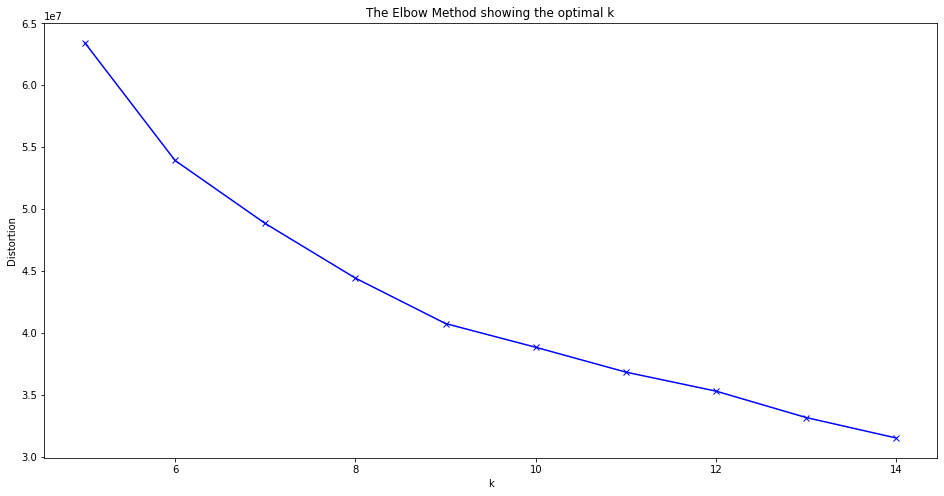

In [8]:
plt.figure(figsize=(16,8))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
test_model = KMeans(n_clusters = 9, random_state = 1) #test using just 5 clusters
test_model.fit(num_data)
df['Cluster'] = test_model.labels_
df['Cluster'].value_counts()

2    94
0    86
4    72
7    54
6    42
5    38
1    28
3    14
8    12
Name: Cluster, dtype: int64

In [10]:
for i in range(9):
    print(i)
    temp = df[df['Cluster'] == i]
    print(temp['POS'].value_counts())
    print()

0
G          28
F          20
['F']      10
['G']       7
C           6
F-C         5
G-F         3
F-G         2
['G-F']     2
['C']       2
['F-C']     1
Name: POS, dtype: int64

1
F        8
C        7
F-C      6
G        2
['C']    2
['F']    2
C-F      1
Name: POS, dtype: int64

2
G             32
F             23
C              8
G-F            6
['G']          6
['F']          6
C-F            4
F-C            2
F-G            1
['G-F']        1
['F', 'G']     1
['F-G']        1
['F-C']        1
['C-F']        1
['C']          1
Name: POS, dtype: int64

3
C        5
F        3
F-C      2
G        2
G-F      1
['F']    1
Name: POS, dtype: int64

4
F          22
G          17
C           8
F-C         7
['G']       6
G-F         4
['C']       2
['F']       2
F-G         1
['G-F']     1
['F-G']     1
['F-C']     1
Name: POS, dtype: int64

5
G          17
F          12
G-F         4
['G-F']     1
['G']       1
['C']       1
F-C         1
['F']       1
Name: POS, dtype: int64

6
G   

In [11]:
test_model.inertia_

40745026.88721548